<a href="https://colab.research.google.com/github/opswami75/Lucidd/blob/master/opsss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [0]:
import os, cv2, itertools
import numpy as np
import pandas as pd

In [3]:
# load vgg model
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()
# summarize the model
#model.summary()

Using TensorFlow backend.


553467904/553467096 [==============================] - 35s 0us/step


In [0]:
from matplotlib import pyplot

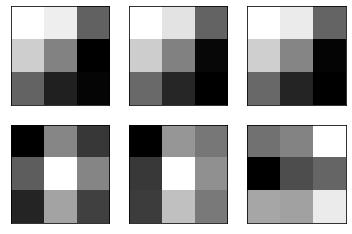

In [0]:
filters,biases= model.layers[1].get_weights()
f_min,f_max= filters.min(),filters.max()
filters = (filters-f_min)/(f_max-f_min)

n,x=2,1
for i in range(n):
  ff=filters[:,:,:,i]
  for j in range(3):
    imgg=pyplot.subplot(n,3,x)
    #print(ff[:,:,j])
    imgg.set_xticks([]);
    imgg.set_yticks([]);
    pyplot.imshow(ff[:,:,j],cmap='gray')
    x+=1
#pyplot.show()
  


In [15]:
!pwd

/content


In [0]:
from google.colab.patches import cv2_imshow
img = cv2.imread('/test.jpg',1)
cv2_imshow(img)

In [0]:
!pip uninstall scipy
!pip install scipy==1.1.0

In [0]:
from vis.visualization import visualize_activation
from vis.utils import utils


In [11]:
idx = utils.find_layer_idx(model,'block3_conv1')
print(idx)


NameError: ignored

In [0]:
from keras import activations
from keras import applications

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


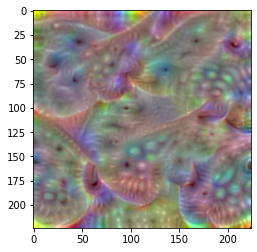

In [0]:
layer_idx = utils.find_layer_idx(model,'predictions')
#changing the activation of the layer to linear
model.layers[layer_idx].activation = activations.linear
#applying modifications to the model
model = utils.apply_modifications(model)
#Indian elephant
img3 = visualize_activation(model,layer_idx,filter_indices=5,max_iter=250,verbose=0)
pyplot.imshow(img3)

In [0]:
new_img = cv2.resize(img, dsize=(224, 224))

In [0]:
img=np.array(img)


In [0]:
model = models.Model(inputs=model.inputs, outputs=model.layers[1].output)

In [0]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims


In [9]:
model = VGG16()
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [0]:
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()
# load the image with the required shape
img = load_img('/test.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1])
		ix += 1
# show the figure
pyplot.show()

In [0]:
model=VGG16()

In [0]:
a=[]
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	print(i, layer.name,layer.output.shape)

In [0]:
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
feature_maps = model.predict(img)

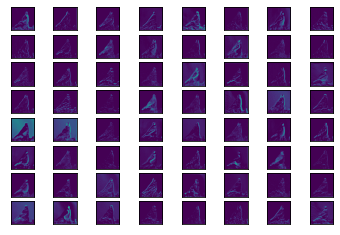

In [81]:
square = 8
fmap=feature_maps[1]
# plot all 64 maps in an 8x8 squares
ix = 1
for _ in range(square):
  for _ in range(square):
    # specify subplot and turn of axis
    ax = pyplot.subplot(square, square, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    pyplot.imshow(fmap[0, :, :, ix-1])
    ix += 1
# show the figure
pyplot.show()
